In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
!pip install --upgrade numpy==1.16.1
!pip install tensorflow==2.0.0-beta1
import tensorflow as tf

tf.__version__
print("TensorFlow version: {}".format(tf.__version__))



print("Eager execution: {}".format(tf.executing_eagerly()))

tf.keras.__version__


In [ ]:
# this function reads in a textfile and fixes an issue with \\
def filereader(path): 
  with open(path, mode="r", encoding="utf-8") as f:
    for line in f:
      yield line.strip().replace("\\","")

import re
import random
import time
import math
import numpy as np
import nltk
import os
import matplotlib.pyplot as plt
plt.style.use('default')

In [ ]:
# We can use NLTK to print the tree structure more nicely
from nltk import Tree
from nltk.treeprettyprinter import TreePrettyPrinter
tree = Tree.fromstring(s)
print(TreePrettyPrinter(tree))

In [ ]:
# Let's first make a function that extracts the tokens (the leaves).

def tokens_from_treestring(s):
  """extract the tokens from a sentiment tree"""
  return re.sub(r"\([0-9] |\)", "", s).split()
 
# let's try it on our example tree
tokens = tokens_from_treestring(s)
print(tokens)
print(len(tokens))

SHIFT = 0
REDUCE = 1


def transitions_from_treestring(s):
  s = re.sub("\([0-5] ([^)]+)\)", "0", s)
  s = re.sub("\)", " )", s)
  s = re.sub("\([0-4] ", "", s)
  s = re.sub("\([0-4] ", "", s)
  s = re.sub("\)", "1", s)
  return list(map(int, s.split()))

  # Now let's first see how large our data sets are.
for path in ("/content//trees/train.txt", "/content//trees/dev.txt", "/content/trees/test.txt"):
  print("{:16s} {:4d}".format(path, sum(1 for _ in filereader(path))))


from collections import namedtuple
from nltk import Tree

# A simple way to define a class is using namedtuple.
Example = namedtuple("Example", ["tokens", "tree", "label", "transitions"])

   
def examplereader(path, lower=False):
  """Returns all examples in a file one by one."""
  for line in filereader(path):
    line = line.lower() if lower else line
    tokens = tokens_from_treestring(line)
    if (len(tokens) <= 70):
      tree = Tree.fromstring(line)  # use NLTK's Tree
      label = int(line[1])
      trans = transitions_from_treestring(line)
      yield Example(tokens=tokens, tree=tree, label=label, transitions=trans)
  

# Let's load the data into memory.
LOWER = False  # we will keep the original casing
train_data = list(examplereader("/content/train.txt", lower=LOWER))
dev_data = list(examplereader("/content/dev.txt", lower=LOWER))
test_data = list(examplereader("/content/test.txt", lower=LOWER))

print("train", len(train_data))
print("dev", len(dev_data))
print("test", len(test_data))

In [ ]:
# from tf.keras.models import Sequential  # This does not work!

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.datasets import imdb

from tensorflow.keras.preprocessing import sequence
import gensim.models.keyedvectors as word2vec #need to use due to depreceated model


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve,  roc_auc_score, classification_report


import codecs

import re
import nltk
import pandas as pd
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/My Drive/turkish_sentiment_data.csv'
clear_file = '/content/drive/My Drive/turkish_sent_clear.csv'

path_neg='/content/drive/My Drive/_movie_neg.csv'
path_pos = '/content/drive/My Drive/_movie_pos.csv'

df = pd.read_csv(path,error_bad_lines=False, warn_bad_lines=False,delimiter=';',header=0,engine='python')
print(df)
#columns of the csv file
column_names = ['tweet', 'sentiment']
print(df.columns.tolist())


#Dividing the dataset into features and labels
feature_names = column_names[:-1]
label_name = column_names[-1]


print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

In [ ]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd

posList = []
negList = []
labels = []


path_neg='/content/negative'
path_pos = '/content/positive'

def open_f(filename,aList):
    with codecs.open(filename, 'r',encoding="utf-8") as f:
         content = f.readlines()
         content = [x.strip() for x in content]
         for x in content:
             aList.append(x)
             #print(x)

open_f(path_neg,negList)
open_f(path_pos,posList)

train_list = posList + negList


#print(negList)

def labelTraining(posList,negList,labels):
    for x in posList:
        labels.append(1)
    for x in negList:
        labels.append(0)

labelTraining(posList,negList,labels)
dictionary = dict(zip(train_list, labels))

df = pd.DataFrame(list(dictionary.items()),
                      columns=['tweet','sentiment'])
print(df)

                                                  tweet  sentiment
0     okuyun, okuyun ve sona geldiğinizde şaşırıp ka...          1
1     ahmet ümit in okuduğum ilk romanı. karakter se...          1
2     bence ahmet ümitin en iyi romanı. diğer yazdık...          1
3     ahmet ümiti bu kitapla tanıdım ve okuduğum tüm...          1
4     ahmet ümitten yine merak ve şüphe dolu bir ser...          1
...                                                 ...        ...
1395  sırf okumak için okudum neredeyse.tipik bir tü...          0
1396  bir orhan pamuk klasiği olarak anlatımlar çok ...          0
1397  arkadaşlar burada çok satılınca merak edip git...          0
1398  orhan pamukun birçok eserini okuyan biri olara...          0
1399  orhan pamuk malum...bir kitap okuyup hayatı de...          0

[1400 rows x 2 columns]


In [ ]:
#Dividing the dataset into features and labels
tweets = df['tweet']
labels = df['sentiment']


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train = df.loc[:1400, 'tweet'].values
y_train = df.loc[:1400, 'sentiment'].values

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train,test_size=0.2, random_state=1)
x_train, x_validation, y_train, y_validation = train_test_split(x_train,y_train, test_size=0.2, random_state=1)

In [ ]:
tweets_split = []

punctuation = "rt.#,_;'!?:,/-()1234567890«»^—%&[]*@"
punctuation2 = ".#,_;'!?,/-()«»^—%&[]*@:"

for i, line in enumerate(tweets):
    #print(line)
    token = str(line).lower().split()
    table = str.maketrans('', '', punctuation2)
    token = [w.translate(table) for w in token]
    clear_token = []
    for word in token:
        clear_token.append(word)
    tweets_split.append(clear_token)

print(tweets_split[1:5])

[['ahmet', 'ümit', 'in', 'okuduğum', 'ilk', 'romanı', 'karakter', 'seçimi', 'beyoğlunu', 'anlatışı', 'üslubu', 'çok', 'iyi', 'okurken', 'kendinizi', 'beyoğlunda', 'gezerken', 'romanın', 'kahramanlarıyla', 'sohbet', 'ederken', 'bulacaksınız', 'tavsiye', 'ediyorum'], ['bence', 'ahmet', 'ümitin', 'en', 'iyi', 'romanı', 'diğer', 'yazdıklarından', 'bir', 'adım', 'önde', 'sıkılmadan', 'okuyabileceğiniz', 'bir', 'kitap', 'kesinlikle', 'tavsi', 'ye', 'ederi', 'm'], ['ahmet', 'ümiti', 'bu', 'kitapla', 'tanıdım', 've', 'okuduğum', 'tüm', 'türk', 'yazarlar', 'içinde', 'favorim', 'olay', 'örgüsü', 've', 'kalemi', 'çok', 'başarılı', 'bütün', 'kitapları', 'sizi', 'kendine', 'bağlıyor', 've', 'kitap', 'bitsin', 'istemiyorsunuzbu', 'kitabı', 'da', 'mükemmel', 'derecede', 'sürükleyici', 've', 'tüm', 'kitap', 'son', 'dört', 'sayfada', 'çözümleniyortüm', 'kitaplarını', 'okumanızı', 'tavsiye', 'ederim'], ['ahmet', 'ümitten', 'yine', 'merak', 've', 'şüphe', 'dolu', 'bir', 'serüven', 'her', 'nekadar', 'kavi

In [ ]:
# for w in word_vec:
#     print("Vector components of a word: {}".format(w))


print(tweets_split.__len__())

maxlen = 200

output_dim = len(np.unique(df.sentiment))
# create the tokenizer
tokenizer = Tokenizer()
# fit the tokenizer on the documents
tokenizer.fit_on_texts(tweets_split)
# sequence encode
sequences = tokenizer.texts_to_sequences(tweets_split)


word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
labels = (np.asarray(labels))

print('Shape of data tensor:', tweets.shape)
print('Shape of label tensor:', labels.shape)

# split the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

VALIDATION_SPLIT = 0.2
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_test = data[-nb_validation_samples:]
y_test = labels[-nb_validation_samples:]

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)



1400
Found 11710 unique tokens.
Shape of data tensor: (1400,)
Shape of label tensor: (1400,)
(1120, 200)
(1120,)
(280, 200)
(280,)
(280, 200)
(280,)


In [ ]:
sequence_length = 500
top_words = len(word_index)+1
embedding_dim = 300
filter_sizes = [3,4,5]
num_filters = 256
drop = 0.5

nb_epoch = 2
batch_size = 256



In [ ]:
max_features = 1000
maxlen = 200
batch_size = 32
print('Loading data...')
#(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(x_train, maxlen=maxlen)
input_test = sequence.pad_sequences(x_test, maxlen=maxlen)
input_train_small = input_train[:100]
input_test_small= input_test[:100]
y_train_small = y_train[:100]

y_test_small = y_test[:100]

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


Loading data...
1120 train sequences
280 test sequences
Pad sequences (samples x time)
x_train shape: (1120, 200)
x_test shape: (280, 200)


In [ ]:
embedding_vector_length = maxlen
model = tf.keras.Sequential([
   tf.keras.layers.Embedding(top_words, 32, input_length=maxlen, embeddings_initializer='random_uniform'),
    tf.keras.layers.SimpleRNN(32, kernel_initializer='random_uniform'),  # input shape required
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid,),
])


In [ ]:
predictions = model(input_train_small)
predictions = tf.reshape(predictions,[len(input_train_small),])
print('y_train shape:', y_train_small.shape)
print('predictions shape:', predictions.shape)

y_train shape: (100,)
predictions shape: (100,)


In [ ]:
print(y_train_small)
print(predictions)

In [ ]:

loss_object = tf.keras.losses.binary_crossentropy

def loss(model, x, y):
    predictions = model(x)
    predictions = tf.reshape(predictions,[len(x),])
    return loss_object(y_true=y, y_pred=predictions)

l = loss(model, input_train_small, y_train_small)

In [ ]:
print(l)

tf.Tensor(0.70022637, shape=(), dtype=float32)


In [ ]:
def get_best_solution(beeList):

  beeList.sort(key=lambda bee: bee.Loss, reverse=False)
  best_loss = beeList[0].Loss
  best_weights = beeList[0].Weight
  best_model = beeList[0].Model
      
  return best_loss,best_weights,best_model

In [ ]:
def performBeeDance(weights,ngh):
  
  #random.shuffle(weights)
  gamma_shape_parameter = 1.5
  gamma_scale_parameter = 0.5
  counter = 0
  #ngh = tf.random.uniform(tf.shape(ngh), minval=0, maxval=1, dtype=tf.float32, seed=None, name=None)
  #print(weights)
  for w in weights:
      w = tf.random.shuffle(w)
     # x = np.random.uniform(-ngh, ngh)
     # w_np = w + x 
      
     # print(w)
      #print("Before Bee Dance weights: {}".format(w))
      w_random1 = tf.random.uniform(tf.shape(w), minval=-ngh, maxval=ngh, dtype=tf.float32, seed=None, name=None)

     # w_random2 = tf.random.gamma(tf.shape(w), alpha=gamma_shape_parameter, beta=1/gamma_scale_parameter)
      w_tf = w + w_random1 
      
      if w != 0:
         w = w_tf
         #w = SVDControl(w_tf, ngh)

      #w = tf.random.shuffle(w)
      #print("After Bee Dance weights: {}".format(w1))
      #print("After Bee Dance weights: {}".format(w2))


In [ ]:
def loss_grad(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)


l = loss_grad(model, input_train_small, y_train_small, training=False)
print("Loss test: {}".format(l))

Loss test: [0.69304675 0.69160795 0.69282913 0.6914518  0.6917697  0.6919516
 0.6927844  0.69256544 0.69260144 0.69149286 0.69430715 0.69138885
 0.6915893  0.6923164  0.69244844 0.6926114  0.6926939  0.69148505
 0.6916187  0.6915004  0.69245386 0.69207865 0.692249   0.69251233
 0.69135916 0.69135803 0.6923216  0.6920943  0.69147146 0.693862
 0.691582   0.6925932  0.69200623 0.691912   0.6916672  0.6914627
 0.69220644 0.69165695 0.69177127 0.6916747  0.69143796 0.6914447
 0.6913475  0.69163924 0.6914737  0.6915441  0.6920615  0.6927288
 0.6917793  0.6915713  0.69165254 0.69276184 0.69220454 0.6920134
 0.6922325  0.69289756 0.69140685 0.69640577 0.69202536 0.6930428
 0.69239897 0.6930899  0.6918473  0.692136   0.69156265 0.69151497
 0.69184244 0.6913642  0.6914473  0.69525087 0.69190633 0.6914492
 0.6915377  0.6916259  0.69262713 0.6914588  0.6917295  0.6928773
 0.6913534  0.6915521  0.69173276 0.69139344 0.69136053 0.6918822
 0.69236624 0.69319624 0.6921177  0.69171643 0.69187087 0.6913

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [ ]:
def NoMoreVanishOrExplode(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss_grad(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [ ]:
def SVDControl(weights,ngh,batch_input,batch_output):

  bounds = []
  #random.shuffle(weights)
  counter = 0
  if weights is not None:
    for w in weights:
    #w += ngh
    # a is a tensor.
    # s is a tensor of singular values.
    # u is a tensor of left singular vectors.
    # v is a tensor of right singular vectors.
      shape_list = w.get_shape().as_list()
    #print(shape_list)
      #print("before", w)
      if(len(shape_list)==2):
        s, u, v = tf.linalg.svd(w)
       #print(tf.shape(s))
       #print("before,",s)
        y = s
        bound = []
        for k in range(len(s)): 
            if s[k] > 1+ngh:
              #print("big", s[k])
              bound.append(1+ngh)
            elif s[k] <= 1/(1+ngh):
              #print("small," , s[k])
              bound.append(1/(1+ngh))
            else:
          # print("notr",s[k])
              bound.append(tf.constant(s[k]))
        y_ = tf.reshape(bound, tf.shape(s))
        s = y_
        bounds.append(y_)
        tf_w_approx = tf.matmul(u, tf.matmul(tf.linalg.diag(s), v, adjoint_b=False))   
        w = tf_w_approx
    return weights



In [ ]:
SVDControl(model.weights,0.5,input_train_small,y_train_small)


In [ ]:
def rotateWeights(weights,ngh):
  
  #random.shuffle(weights)
  gamma_shape_parameter = 1.5
  gamma_scale_parameter = 0.5
  counter = 0
  #ngh = tf.random.uniform(tf.shape(ngh), minval=-ngh, maxval=ngh, dtype=tf.float32, seed=None, name=None)
  #print(weights)
  for w in weights:
    shape_list = w.get_shape().as_list()
    if(len(shape_list)==2):
       s, u, v = tf.linalg.svd(w)
       #a = tf.constant(s)
       cond = tf.equal(s, tf.reduce_max(s))
       s_min = tf.where(cond, s, tf.zeros_like(s))
      
       #tf_w_approx = tf.matmul(u, tf.linalg.matrix_transpose(v))
       #print("before", w)
       #print("s", s)
       #s = -1*s
       #s_ = tf.linalg.inv(s,adjoint=True)
       tf_w_approx = tf.matmul(u, tf.matmul(tf.linalg.diag(s_min), v, adjoint_b=False))
       w = tf_w_approx
       #print("after",w)
       #w = tf.random.shuffle(w)  



In [ ]:
#rotateWeights(best_weights,0.1)

In [ ]:
import numpy as np
import random


class Bee():
    def __init__(self,Weight,Loss,Model):
        self.Weight = Weight
        self.Loss = Loss
        self.Model = Model

    def __getWeight__(self):
        return self.Weight

    def __getLoss__(self):
        return self.Loss

    def __getModel__(self):
        return self.Model

    Weight: []
    Loss: float
    Model: object  

initial_loses = []
initial_weights = []
initial_models = []

#Create initial Solutions

def initial_solutions(nScout,batch_input,batch_output):
  for i in range(nScout):
      model = tf.keras.Sequential([
      tf.keras.layers.Embedding(top_words, 32, input_length=maxlen, embeddings_initializer='random_uniform'),
      tf.keras.layers.SimpleRNN(32, kernel_initializer='random_uniform'),  # input shape required
      tf.keras.layers.Dense(1, activation=tf.nn.sigmoid,)])

      l = loss(model, batch_input, batch_output)
      print(l)
    
      bee = Bee(0,0,None)
      bee.Weight = model.weights
      bee.Loss = l
      bee.Model = model
    
      beeList.append(bee)
   
      initial_loses.append(l)
      initial_weights.append(model.weights)
      initial_models.append(model)
    
  return beeList
    



In [ ]:
import math

def recruitmentPhase(beeList, nSelectedSite, nEliteSite, ngh, batch_input, batch_output):
        
       # print(len(beeList))
       # beeList.sort(key=lambda bee: bee.Loss, reverse=False)

        # Elite Sites
        for i in range(nEliteSite):
            #print("1111",i)

            old_weight = beeList[i].Model.get_weights()
           # print(old_weight)
            best_new_loss = math.inf

            for j in range(nEliteSiteBee):
                new_weight = performBeeDance(beeList[i].Weight, ngh)
               # new_weight = mutateWeights(new_weight, ngh)

                beeList[i].Model.set_weights = np.asarray(new_weight)
               # print(new_weight)
                new_loss = tf.reduce_mean(loss(beeList[i].Model, batch_input, batch_output))
                beeList[i].Model.set_weights = np.asarray(old_weight)
                
                if new_loss < best_new_loss:
                    best_new_loss = new_loss
                    best_new_weight = new_weight

            if best_new_loss < beeList[i].Loss:
                beeList[i].Loss = best_new_loss
                beeList[i].Weight = best_new_weight
                beeList[i].Model.set_weights = np.asarray(best_new_weight)

        # Selected Non-Elite Sites
        for i in range(nEliteSite,nSelectedSite):
            #print("2222",i)
            old_weight = beeList[i].Model.get_weights()
            
            best_new_loss = math.inf

            for j in range(nSelectedSiteBee):
                              #  new_weight = performBeeDance(beeList[i].Weight, ngh)
                #print("before SVD", beeList[i].Model.trainable_variables)
                loss_, grads = NoMoreVanishOrExplode(beeList[i].Model,input_train_small, y_train_small)
               # print(loss_)
                    
                optimizer.apply_gradients(zip(grads, beeList[i].Model.trainable_variables))

                new_weight = SVDControl(beeList[i].Weight, ngh, batch_input, batch_output)
                beeList[i].Model.set_weights = np.asarray(new_weight)
                new_loss = tf.reduce_mean(loss(beeList[i].Model, batch_input, batch_output))
                beeList[i].Model.set_weights = np.asarray(old_weight)          
                
                if new_loss < best_new_loss:
                    best_new_loss = new_loss
                    best_new_weight = new_weight

            if best_new_loss < beeList[i].Loss:
                beeList[i].Loss = best_new_loss
                beeList[i].Weight = best_new_weight
                beeList[i].Model.set_weights = np.asarray(best_new_weight)
               # print("after SVD",beeList[i].Model.trainable_variables)


In [ ]:
def globalPhase(beeList, nSelectedSite, nScoutBee, batch_input, batch_output):


    # Non - Selected Sites
    for i in range(nSelectedSite,nScoutBee):
        #print("33333",i)
        model = tf.keras.Sequential([
        tf.keras.layers.Embedding(top_words, 32, input_length=maxlen, embeddings_initializer='random_uniform'),
        tf.keras.layers.SimpleRNN(32, kernel_initializer='random_uniform'),  # input shape required
        tf.keras.layers.Dense(1, activation=tf.nn.sigmoid,)])

        
        l = loss(model, batch_input, batch_output)
    
        #print("Global loss",l)
        # beeList[i].Loss = l
        beeList[i].Loss = l
        beeList[i].Weight = model.weights
        beeList[i].Model = model

In [ ]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D


In [ ]:
maxIt = 12
nScout = 3
nSelectedSite = 2
nEliteSite = 1
nSelectedSiteBee = 1
nEliteSiteBee = 1
ngh = 0.5  # Neighborhood Radius

rdamp = 0.05 # Neighborhood Radius Damp Rate

num_epochs = 1

iters  = [] # save the iteration counts here for plotting
losses = [] # save the avg loss here for plotting

for epoch in range(100):

  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.BinaryAccuracy()


  for i in range(100):

    batch_input = input_train[i:i+1]
    batch_output = y_train_small[i] 
    beeList = []
    beeList = initial_solutions(nScout,batch_input,batch_output)
    best_loss,best_weights,best_model = get_best_solution(beeList)
    #print("Best weights: {}".format(bestWeight))
    print("Best loss: {}".format(best_loss))
    #print("Best model: {}".format(bestModel.get_config()))
    # Array to Hold Best Cost Values
   
    BestCost = [0] * maxIt
    TotalCost = [0] * maxIt

   # site abandonment threshold
    sat = 300000
    counter = 0
    improvement = None
  
    for it in range(maxIt):
  
       recruitmentPhase(beeList, nSelectedSite, nEliteSite, ngh, batch_input, batch_output)
       globalPhase(beeList, nSelectedSite, nScout, batch_input, batch_output)
       best_loss,best_weights,best_model = get_best_solution(beeList)
    
       #Store Best Cost Ever Found
       BestCost[it] = best_loss
     
    
       #Display Iteration Information
       print(['Iteration ' + str(it) + ': Best Cost = ' + str(BestCost[it])])
       #Damp Neighborhood Radius
       ngh = ngh * rdamp
       
       # sphinx_gallery_thumbnail_number = 2

        # save the current training information
    iters.append(i)
    losses.append(float(best_loss))

# plotting
plt.plot(iters, losses)
plt.title("Training Curve with BA")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [ ]:
print(losses)
print(len(losses))


In [ ]:
batch_loss = []
total_loss = []

total_acc = []
batch_acc= []

maxIt = 10
nScout = 3
nSelectedSite = 2
nEliteSite = 1
nSelectedSiteBee = 1
nEliteSiteBee = 1
ngh = 0.5  # Neighborhood Radius

rdamp = 0.05 # Neighborhood Radius Damp Rate

num_epochs = 1



for epoch in range(num_epochs):

  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.BinaryAccuracy()


  for i in range(100):

    batch_input = input_test_small[i:i+1]
    batch_output = y_test_small[i] 
    beeList = []
    beeList = initial_solutions(nScout,batch_input,batch_output)
    best_loss,best_weights,best_model = get_best_solution(beeList)
    #print("Best weights: {}".format(bestWeight))
    print("Best loss: {}".format(best_loss))
    #print("Best model: {}".format(bestModel.get_config()))
    # Array to Hold Best Cost Values
   
    BestCost_test = [0] * maxIt

   # site abandonment threshold
    sat = 300000
    counter = 0
    improvement = None
  
    for it in range(maxIt):
  
       recruitmentPhase(beeList, nSelectedSite, nEliteSite, ngh, batch_input, batch_output)
       globalPhase(beeList, nSelectedSite, nScout, batch_input, batch_output)
       best_loss,best_weights,best_model = get_best_solution(beeList)
    
       #Store Best Cost Ever Found
       BestCost_test[it] = best_loss
    
       #Display Iteration Information
       print(['Iteration ' + str(it) + ': Best Cost = ' + str(BestCost_test[it])])
       batch_loss.append(best_loss)
      #Damp Neighborhood Radius

       ngh = ngh * rdamp
   
       batch_acc = epoch_accuracy(batch_output, model(batch_input, training=True))
    
    total_loss.append(total_loss)
    batch_loss = []

    total_acc.append(batch_acc)
    batch_acc = []



In [ ]:
from keras import backend as K

model=best_model

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

history = model.fit(x=input_train, 
            y=y_train, 
            epochs=10, 
            validation_data=(input_test, y_test), 
            batch_size=32)

# fit the model
#history = model.fit(input_train, y_train, validation_split=0.3, epochs=10, verbose=0)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(input_test, y_test, verbose=0)



Train on 1120 samples, validate on 280 samples
Epoch 1/10
1120/1120 [==============================] - 9s 8ms/sample - loss: 0.6943 - acc: 0.4696 - f1_m: 0.2576 - precision_m: 0.2402 - recall_m: 0.4028 - val_loss: 0.6934 - val_acc: 0.4929 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/10
1120/1120 [==============================] - 8s 7ms/sample - loss: 0.6923 - acc: 0.5232 - f1_m: 0.1414 - precision_m: 0.1107 - recall_m: 0.2000 - val_loss: 0.6943 - val_acc: 0.5071 - val_f1_m: 0.6679 - val_precision_m: 0.5081 - val_recall_m: 1.0000
Epoch 3/10
1120/1120 [==============================] - 8s 7ms/sample - loss: 0.6946 - acc: 0.5009 - f1_m: 0.6045 - precision_m: 0.4596 - recall_m: 0.9068 - val_loss: 0.6932 - val_acc: 0.4929 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/10
1120/1120 [==============================] - 8s 7ms/sample - loss: 0.6941 - acc: 0.4938 - f1_m: 0.1892 - precision_m: 0.1668 - recall_m: 0

In [ ]:
print(f1_score)

0.0


In [ ]:
model = best_model
 
 
model.compile(optimizer='sgd',
                loss='binary_crossentropy',
                metrics=['accuracy'])

#logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

history = model.fit(x=input_train_small, 
            y=y_train_small, 
            epochs=100, 
            validation_data=(input_test_small, y_test_small))



sgd acc  0.9
sgd_val_acc, 0.58
avg sgd acc  0.5742999985814095
avg sgd_val_acc, 0.4940000095963478
best sgd loss 0.37689284451305866
best sgd_val, 0.6898085862398148
avr sgd loss 0.6686201716437938
sgd_val, 0.7252772264629601
best ba loss,, 0
best ba_val loss tf.Tensor(1.1920929e-07, shape=(), dtype=float32)
avr ba loss, 0.0
avr ba_val,  tf.Tensor(0.054646667, shape=(), dtype=float32)


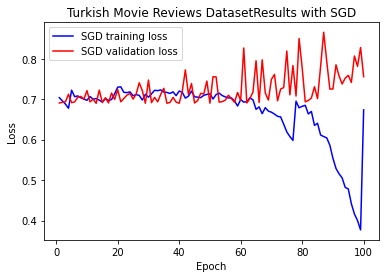

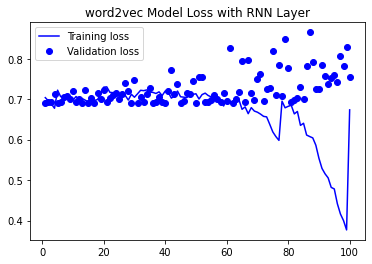

In [ ]:
import matplotlib.pyplot as plt


#F1 Score = 2*(Recall * Precision) / (Recall + Precision)

acc = history_test.history['accuracy']
val_acc = history_test.history['val_accuracy']
loss = history_test.history['loss']
val_loss = history_test.history['val_loss']



max_acc = max(acc)
min_acc = min(acc)
avg_acc = sum(acc)/len(acc)

max_val_acc = max(val_acc)
min_val_acc = min(val_acc)
avg_val_acc = sum(val_acc)/len(val_acc)

max_loss = max(loss)
min_loss = min(loss)
avg_loss = sum(loss)/len(loss)

max_val_loss = max(val_loss)
min_val_loss = min(val_loss)
avg_val_loss = sum(val_loss)/len(val_loss)



max_ba = max(BestCost)
min_ba = min(BestCost)
avg_ba = sum(BestCost)/len(BestCost)

max_val_ba = max(BestCost_test)
min_val_ba = min(BestCost_test)
avg_val_ba = sum(BestCost_test)/len(BestCost_test)


print("sgd acc " , max_acc)
print("sgd_val_acc,",max_val_acc)

print("avg sgd acc " , avg_acc)
print("avg sgd_val_acc,",avg_val_acc)

print("best sgd loss", min_loss)
print("best sgd_val,",min_val_loss)

print("avr sgd loss", avg_loss)
print("sgd_val,",avg_val_loss)

print("best ba loss,,", min_ba)
print("best ba_val loss" , min_val_ba)

print("avr ba loss,", avg_ba)
print("avr ba_val, " , avg_val_ba)

epochs = range(1, len(acc)+1)
plt.plot(epochs, loss, 'b', label='SGD training loss')
plt.plot(epochs, val_loss, 'r', label='SGD validation loss')
#plt.plot(epochs, sgdloss, 'y', label='SGD training loss')
#plt.plot(epochs, sgdval_loss, 'p', label='SGD validation loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.title('Turkish Movie Reviews DatasetResults with SGD')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('word2vec Model Loss with RNN Layer')
plt.legend()
plt.show()

In [ ]:
maxIt = 10
nScout = 3
nSelectedSite = 2
nEliteSite = 1
nSelectedSiteBee = 1
nEliteSiteBee = 1
ngh = 0.5  # Neighborhood Radius

rdamp = 0.05 # Neighborhood Radius Damp Rate

num_epochs = 1

val_iters  = [] # save the iteration counts here for plotting
val_losses = [] # save the avg loss here for plotting

for epoch in range(100):

  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.BinaryAccuracy()


  for i in range(100):

    batch_input = input_test_small[i:i+1]
    batch_output = y_test_small[i] 
    beeList = []
    beeList = initial_solutions(nScout,batch_input,batch_output)
    best_loss,best_weights,best_model = get_best_solution(beeList)
    #print("Best weights: {}".format(bestWeight))
    print("Best loss: {}".format(best_loss))
    #print("Best model: {}".format(bestModel.get_config()))
    # Array to Hold Best Cost Values
   
    BestCost = [0] * maxIt
    ValCost = [0] * maxIt

   # site abandonment threshold
    sat = 300000
    counter = 0
    improvement = None
  
    for it in range(maxIt):
  
       recruitmentPhase(beeList, nSelectedSite, nEliteSite, ngh, batch_input, batch_output)
       globalPhase(beeList, nSelectedSite, nScout, batch_input, batch_output)
       best_loss,best_weights,best_model = get_best_solution(beeList)
    
       #Store Best Cost Ever Found
       ValCost[it] = best_loss
     
    
       #Display Iteration Information
       print(['Iteration ' + str(it) + ': Best Cost = ' + str(ValCost[it])])
       #Damp Neighborhood Radius
       ngh = ngh * rdamp
       
       # sphinx_gallery_thumbnail_number = 2

        # save the current training information
    val_iters.append(i)
    val_losses.append(float(best_loss))

# plotting
plt.plot(iters, val_losses)
plt.title("Validation Curve with BA")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [ ]:
train_accuracy=[]
for i in range(len(acc)):
   train_accuracy.append( 1- acc[i])

# plotting
plt.plot(iters, losses)
plt.plot(iters, val_loss)
plt.title("Training Loss for Turkish Movie-Sentiment Dataset with BA-SVD ")
plt.xlabel("Loss")
plt.ylim(ymin=0,ymax=1) 

plt.ylabel("Accuracy")
plt.show()

max_acc = max(train_accuracy)
min_acc = min(train_accuracy)
avg_acc = sum(train_accuracy)/len(train_accuracy)

max_loss = max(losses)
min_loss = min(losses)
avg_loss = sum(losses)/len(losses)

print("training max acc",max_acc)
print("training min acc",min_acc)
print("training avr acc",avg_acc)

print("training max loss",max_loss)
print("training min loss",min_loss)
print("training avr loss",avg_loss)

In [ ]:
val_accuracy=[]
for i in range(len(val_loss)):
  val_accuracy.append( 1- val_loss[i])


val_max_acc = max(val_acc)
val_min_acc = min(val_acc)
val_avg_acc = sum(val_acc)/len(val_acc)

val_max_loss = max(val_loss)
val_min_loss = min(val_loss)
val_avg_loss = sum(val_loss)/len(val_loss)

print("max",val_max_acc)
print("min",val_min_acc)
print("avr",val_avg_acc)

print("max",val_max_loss)
print("min",val_min_loss)
print("avr",val_avg_loss)

max 0.57
min 0.43
avr 0.49300000071525574
max 5.784786815643311
min 0.6837753915786743
avr 1.0881426008403305


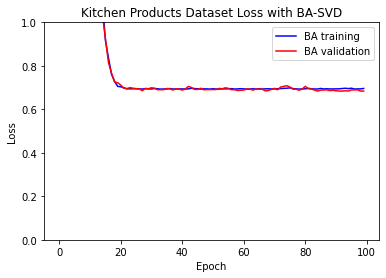

In [ ]:
import matplotlib.pyplot as plt

plt.figure()

# plotting
#plt.title('RNN Sentiment Classification Loss on Turkish Twitter dataset')

plt.plot(iters, loss, 'b', label='BA training')
plt.plot(iters, val_loss, 'r', label='BA validation')
plt.title("Kitchen Products Dataset Loss with BA-SVD")
plt.ylim(ymin=0,ymax=1) 
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


training max acc 0.52
training min acc 0.41
training avr acc 0.5051999846100808
training max loss 2.0414506340026857
training min loss 0.6921529293060302
training avr loss 0.7341937294244765
max 0.55
min 0.46
avr 0.48410001158714294
max 1.570418267250061
min 0.6897616577148438
avr 0.7194340163946148


<Figure size 432x288 with 0 Axes>

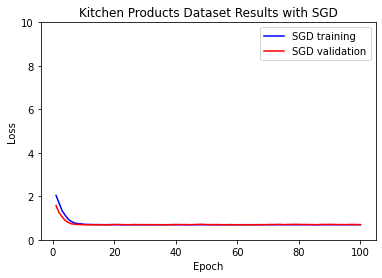

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt


#F1 Score = 2*(Recall * Precision) / (Recall + Precision)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

max_acc = max(acc)
min_acc = min(acc)
avg_acc = sum(acc)/len(acc)

max_loss = max(loss)
min_loss = min(loss)
avg_loss = sum(loss)/len(loss)

print("training max acc",max_acc)
print("training min acc",min_acc)
print("training avr acc",avg_acc)

print("training max loss",max_loss)
print("training min loss",min_loss)
print("training avr loss",avg_loss)

val_max_acc = max(val_acc)
val_min_acc = min(val_acc)
val_avg_acc = sum(val_acc)/len(val_acc)

val_max_loss = max(val_loss)
val_min_loss = min(val_loss)
val_avg_loss = sum(val_loss)/len(val_loss)

print("max",val_max_acc)
print("min",val_min_acc)
print("avr",val_avg_acc)

print("max",val_max_loss)
print("min",val_min_loss)
print("avr",val_avg_loss)

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'b', label='SGD training')
plt.plot(epochs, val_loss, 'r', label='SGD validation')
plt.ylim(ymin=0,ymax=10) 
plt.title("Kitchen Products Dataset Results with SGD")
plt.xlabel('Epoch')
plt.ylabel('Loss')
 
plt.legend()
plt.figure()


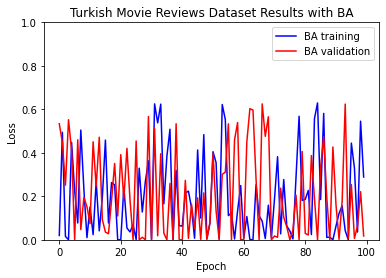

In [ ]:
import matplotlib.pyplot as plt
iters =[]
for i in range(100):
  iters.append(i)

plt.figure()

# plotting
#plt.title('RNN Sentiment Classification Loss on Turkish Twitter dataset')

plt.plot(iters, losses, 'b', label='BA training')
plt.plot(iters, val_losses, 'r', label='BA validation')
plt.title("Turkish Movie Reviews Dataset Results with BA")
plt.ylim(ymin=0,ymax=1) 
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt


#F1 Score = 2*(Recall * Precision) / (Recall + Precision)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
losses = history.history['loss']
val_losses = history.history['val_loss']



import matplotlib.pyplot as plt
iters =[]
for i in range(100):
  iters.append(i)

plt.figure()

# plotting
#plt.title('RNN Sentiment Classification Loss on Turkish Twitter dataset')

plt.plot(iters, losses, 'b', label='BA training')
plt.plot(iters, val_losses, 'r', label='BA validation')
plt.title("Turkish Movie Reviews Dataset Results with SGD")
plt.ylim(ymin=0,ymax=1) 
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()